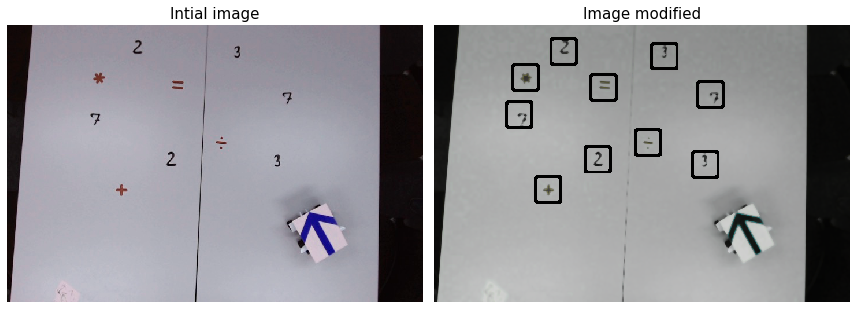

In [31]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage


frame0=cv2.imread("frame0.jpeg")
frame0_copie=ndimage.median_filter(frame0_copie, size=5)
frame0_gray=cv2.cvtColor(frame0, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(frame0_gray, 90, 110, 0)
_, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

area=np.array([0]*len(contours))
for k in range(len(contours)):
    area[k] = cv2.contourArea(contours[k])

mean=np.mean(area)
std=np.abs(area-mean)/len(contours)

index=np.array(np.where((std<0.05*mean) & (std>0.041*mean)))
##fleche robot
index1=np.array(np.where((std<0.04*mean) & (std>0.001*mean)))
M1 = cv2.moments(np.array(contours)[index1[0][0]])
cX1 = int(M1["m10"] / M1["m00"])
cY1 = int(M1["m01"] / M1["m00"])
index=index[0].astype(int)
contours=np.array(contours)[index]
centers=[]
# loop over the contours
for c in contours:
    # compute the center of the contour
    M = cv2.moments(c)
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    
    # draw the contour and center of the shape on the image
    if np.sqrt((cX-cX1)**2+(cY-cY1)**2)>100:
        centers.append([cX,cY])
        #cv2.BoundingRect(points, update=0) 
cpt=len(centers)
k=0
while k<cpt:
    j=0
    while j<cpt:
        if np.sqrt((centers[k][0]-centers[j][0])**2+(centers[k][1]-centers[j][1])**2)<40 and k!=j:
            centers.pop(j)
            cpt=cpt-1
        j+=1
    k+=1

for i in range(len(centers)):
    cX,cY=centers[i][0],centers[i][1]
    cv2.rectangle(frame0_copie, (cX-22, cY-22),(cX+22, cY+22), (0, 0, 0), 3)


# display results
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 12),
                                    sharex=True, sharey=True)

ax1.imshow(frame0, cmap=plt.cm.gray)
ax1.axis('off')
ax1.set_title('Intial image', fontsize=15)

ax2.imshow(frame0_copie, cmap=plt.cm.gray)
ax2.axis('off')
ax2.set_title('Image modified', fontsize=15)


fig.tight_layout()

plt.show()